# Einführung Umweltingenieurwissenschaften - Siedlungswasserwirtschaft - Aufgabe 3

\
Für die Modellierung im Rahmen der Aufgabe 3 müssen lediglich die Differentialgleichungen im Block "Aufstellen des Modells" ergänzt werden.

Untenstehend ein Beispiel für die Implementierung einer Differentialgleichung in Python:
- Mathematische Schreibweise: $\frac{dX}{dt} = a \cdot X + b$
- Python Schreibweise: dXdt = a*X + b

---

Bibliotheken installieren

In [48]:
%pip install -q matplotlib numpy odeintw pandas requests sammhelper scipy tqdm

Bibliotheken importieren

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import odeintw as ow
import pandas as pd
import requests as rq
import sammhelper as sh
import scipy as sp
import tqdm as tq

Parameterdefinition

In [50]:
# Zeit
STARTTIME = 0   # [d] Startzeit
STOPTIME = 20   # [d] Stopzeit
DT = 0.2        # [d] Zeitschritt
time = np.arange(STARTTIME, STOPTIME, DT) # [d] Zeitvektor

# Prozess
DOs = 9.54      # [mgO2 L-1] Sättigungskonzentration von Sauerstoff													
kd = 0.2        # [d-1] Kinetische Konstante für den Sauerstoffverbrauch 																
kr = 0.5        # [d-1]	Kinetische Konstante für die Wiederbelüftung des Flusses															
    
# Anfangsbedingungen
initDO = 8      # [mgO2 L-1] Sauerstoffkonzentration im Fluss vor der Einleitung																	
initL = 38.62   # [mgTOD L-1] TOD am Einlauf 

Aufstellen des Modells

In [51]:
def model(var, t, param):
    DO, L = var
    DOs, kd, kr = param
    
    # Definition der Differentialgleichungen 
    dDOdt = ...											
    dLdt = ...
    
    return dDOdt, dLdt

Lösen des Modells

In [52]:
DO, L = sh.sol_ode(model, var0=[initDO, initL], t=time, param=[DOs, kd, kr])

Abbildung

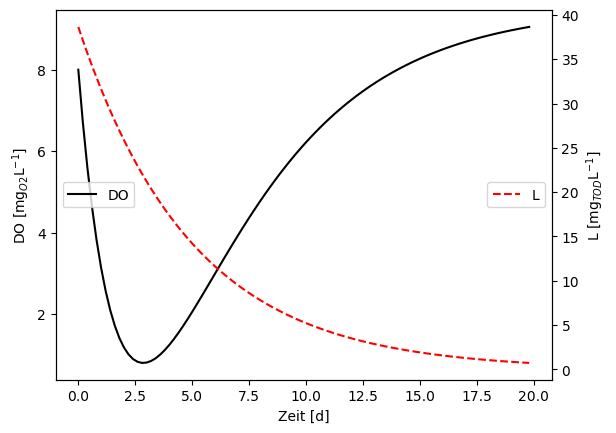

In [53]:
fig, ax1 = plt.subplots()
ax1.plot(time, DO, linestyle='-', color='black', label='DO')
ax1.set_xlabel('Zeit [d]')
ax1.set_ylabel('DO [mg$_{O2}$L$^{-1}$]')
ax1.legend(loc='center left')
ax2 = ax1.twinx()
ax2.plot(time, L, linestyle='--', color='red', label='L')
ax2.set_ylabel('L [mg$_{TOD}$L$^{-1}$]')
ax2.legend(loc='center right')
plt.show()	

Statistik

In [54]:
# Minimale Sauerstoffkonzentration
print(f"Minimale Sauerstoffkonzentration: {np.round(np.min(DO),4)} mgO2 L-1")

# Zeit der minimalen Sauerstoffkonzentration
print(f"Zeit der minimalen Sauerstoffkonzentration: {np.round(time[np.argmin(DO)],3)} d")

# 90% der Sättigungskonzentration erreicht
print(f"90% der Sättigungskonzentration erreicht: {np.round(time[np.where((DO[:-1] < 0.90*DOs) & (DO[1:] >= 0.90*DOs))[0][0]],3)} d")

Minimale Sauerstoffkonzentration: 0.7982 mgO2 L-1
Zeit der minimalen Sauerstoffkonzentration: 2.8 d
90% der Sättigungskonzentration erreicht: 16.4 d
